In [109]:
import fc1 
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import importlib


In [110]:
pd.set_option('display.max_columns', 500)


In [111]:
data = pd.read_csv('../Data Cleansing/cleaned_data_4.csv', index_col = 0)
data

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,team_scored,opposition_scored,GlobalOpponent,avg_influence,avg_ict_index,avg_total_points,avg_bps,avg_minutes,avg_3w_influence,avg_3w_ict_index,avg_3w_total_points,avg_3w_bps,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,team_global,next_fixture,next_position,is_home,target
37,1,0,12,0,10.6,51,9,0,0,2.9,18.2,24,0,0,0,0,1,0,145930,0.0,4,0,0,0,45,0,1,3,10,18.200000,2.900000,4.000000,12.000000,24.000000,18.20,2.90,4.00,12.00,24.00,1.00,3.00,1,4,1,19,10,False,1
38,0,0,3,0,0.8,51,20,1,0,0.4,3.4,16,0,0,0,0,2,0,150680,0.0,1,-4880,6903,11783,45,0,0,1,19,10.800000,1.650000,2.500000,7.500000,20.000000,10.80,1.65,2.50,7.50,20.00,0.50,2.00,10,4,1,4,17,False,1
112,0,0,0,0,0.0,424,17,0,0,0.0,0.0,0,0,0,0,0,2,0,2376,0.0,0,-730,23,753,59,0,1,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,1.00,1.50,4,3,17,0,8,True,1
113,0,0,5,0,15.2,424,28,0,0,4.6,9.8,14,0,0,0,0,3,0,1957,21.0,1,-481,56,537,59,0,1,3,0,3.266667,1.533333,0.333333,1.666667,4.666667,3.27,1.53,0.33,1.67,4.67,1.00,2.00,8,3,17,19,17,False,1
114,0,0,6,0,11.3,424,38,0,0,4.2,9.2,22,0,0,0,0,4,0,1907,21.0,1,-144,143,287,59,0,4,2,19,4.750000,2.200000,0.500000,2.750000,9.000000,6.33,2.93,0.67,3.67,12.00,2.00,2.33,17,3,17,10,7,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85552,0,0,0,0,0.0,32,120,0,0,0.0,0.0,0,0,0,0,0,12,0,785,0.0,0,-9,13,22,49,0,1,2,25,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.67,2.33,8,3,26,22,14,True,0
26085,0,0,0,0,0.0,215,35,0,0,0.0,0.0,0,0,0,0,0,4,0,76174,0.0,0,-4556,1707,6263,54,0,0,5,9,10.600000,1.800000,1.750000,10.250000,45.250000,4.53,0.53,2.00,8.00,30.33,1.67,1.67,2,2,8,2,7,True,0
27461,0,0,0,0,0.0,416,179,0,0,0.0,0.0,0,0,0,0,0,18,0,26409,0.0,0,-5050,175,5225,46,0,1,4,21,6.855556,1.683333,1.444444,4.944444,17.944444,0.00,0.00,0.00,0.00,0.00,0.67,2.33,11,3,17,20,12,False,0
105142,0,0,0,0,0.0,510,29,0,0,0.0,0.0,0,0,0,0,0,4,0,6352,0.0,0,-869,102,971,45,0,1,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.33,1.33,4,2,28,24,20,True,0


In [112]:
out_data = data['target'].copy()
out_data = out_data.astype(float)
in_data = data.drop(['target', 'element'], axis = 1) 

in_data.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'yellow_cards', 'team_scored', 'opposition_scored', 'GlobalOpponent',
       'avg_influence', 'avg_ict_index', 'avg_total_points', 'avg_bps',
       'avg_minutes', 'avg_3w_influence', 'avg_3w_ict_index',
       'avg_3w_total_points', 'avg_3w_bps', 'avg_3w_minutes',
       'avg_3w_team_scored', 'avg_3w_opposition_scored', 'OpponentPosition',
       'element_type', 'team_global', 'next_fixture', 'next_position',
       'is_home'],
      dtype='object')

In [113]:
transform = {}

for col in [*in_data.columns]:
    in_data[col] = (in_data[col] - in_data[col].mean()) / in_data[col].std()

    transform[col] = {'mean': in_data[col].mean(), 'std': in_data[col].std()}


In [7]:
x_data = torch.tensor(in_data.values.astype(float), dtype=torch.float32)
y_data = torch.tensor(out_data.values, dtype=torch.float32)

type(x_data), type(y_data)

(torch.Tensor, torch.Tensor)

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

In [9]:
device = torch.device("cpu")

In [10]:
x_train

tensor([[-0.2389, -0.2797,  0.4218,  ..., -0.1063, -0.0957,  0.9974],
        [-0.2389, -0.2797, -0.8550,  ...,  0.4617,  1.4651,  0.9974],
        [-0.2389, -0.2797, -0.8550,  ...,  0.6890,  0.9448, -1.0026],
        ...,
        [-0.2389, -0.2797,  0.2394,  ..., -0.6744, -0.4425, -1.0026],
        [-0.2389,  1.3638,  1.2426,  ..., -1.4697,  0.0777, -1.0026],
        [-0.2389, -0.2797, -0.5814,  ...,  0.8026,  0.9448, -1.0026]])

In [14]:
def after_subplot(ax: plt.Axes, group_name: str, x_label: str):
    """Add title xlabel and legend to single chart"""
    ax.set_title(group_name)
    ax.set_xlabel(x_label)
    ax.legend(loc="center right")


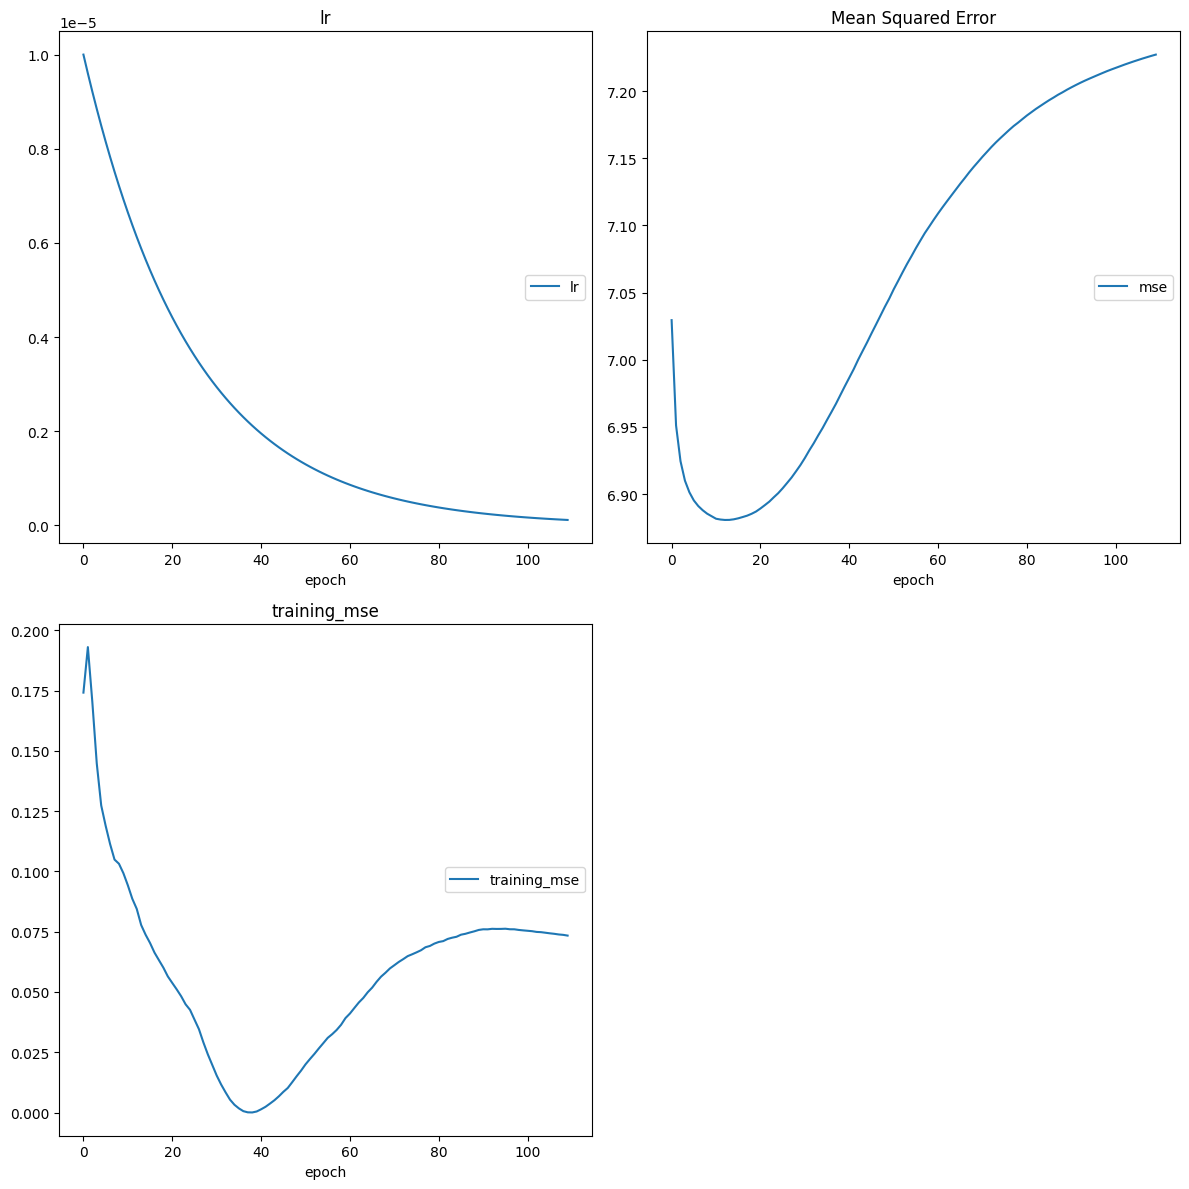

<All keys matched successfully>

In [15]:
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot

liveloss = PlotLosses(outputs=[MatplotlibPlot(after_subplot=after_subplot)])

# train-test split of the dataset
x_data = in_data.values.astype(float)
y_data = out_data.values.astype(float)

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)

X_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(x_valid, dtype=torch.float32)
y_test = torch.tensor(y_valid, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 110   # number of epochs to run
batch_size = 5  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

importlib.reload(fc1)

input_dim = x_train.shape[1]
torch.manual_seed(87)
model = fc1.fc_model(input_dim)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
lr= 0.00001
optimizer = optim.Adam(model.parameters(), lr=lr)
print(model.parameters)


model = model.to(device)

gamma = 0.85
scheduler  = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma) 


# training loop
for epoch in range(n_epochs):
    model.train()

    logs = {}

    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size].to(device)
            y_batch = y_train[start:start+batch_size].to(device)
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            mse_train = float(loss)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
            
    model.eval()
    
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    print(epoch, mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

    logs["lr"] = optimizer.param_groups[0]["lr"]
    logs["mse"] = mse
    logs["training_mse"] = mse_train

    scheduler.step()

    liveloss.update(logs)
    liveloss.send()

# restore model and return best accuracy
model.load_state_dict(best_weights)


MSE: 7.41
RMSE: 2.72


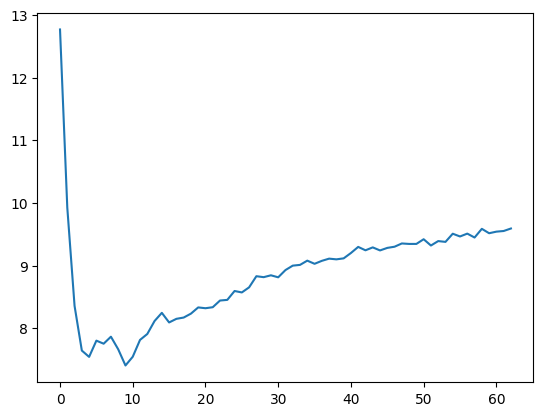

In [ ]:
import matplotlib.pyplot as plt

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()


In [18]:
from datetime import datetime
import json


now = datetime.now()
dt_string = now.strftime("%d:%m_%H:%M_")
best_mse = round(best_mse, 2)

torch.save(model.state_dict(), 'nn1_checkpoints/' + dt_string + str(best_mse) +'.pt')

with open('nn1_checkpoints/' + dt_string + str(best_mse) +'.txt', 'w') as f:
    f.write(str(model.parameters))


model_details_dic = {'hyperparameters': {'lr': lr, 'n_epochs': n_epochs, 'batch_size': batch_size}, 'results': {'mse': best_mse}}

with open('nn1_checkpoints/' + dt_string +'hyperparameters.json', 'w') as f:
    json.dump(model_details_dic, f)



In [19]:
model_details_dic = {'hyperparameters': {'lr': lr, 'n_epochs': n_epochs, 'batch_size': batch_size, 'scheduler_gamma': gamma},
                      'results': {'mse': best_mse, 'mse_train': round(mse_train, 2)}}

with open('nn1_checkpoints/' + dt_string +'hyperparameters.json', 'w') as f:
    json.dump(model_details_dic, f)

In [ ]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")        

tensor([1.], device='mps:0')


---
## Perform Inference

In [20]:

model_eval= fc1.fc_model(input_dim)
model_eval.load_state_dict(torch.load('nn1_checkpoints/18:01_13:02_6.88.pt'))
model_eval.eval()

fc_model(
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=46, out_features=64, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): ReLU()
    )
    (3): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): ReLU()
    )
    (4): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)
      (1): ReLU()
    )
    (5): Sequential(
      (0): Linear(in_features=1024, out_features=2048, bias=True)
      (1): ReLU()
    )
    (6): Sequential(
      (0): Linear(in_features=2048, out_features=1024, bias=True)
      (1): ReLU()
    )
    (7): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): ReLU()
    )
    (8): Sequential(
      (0): Linear(in_features=512, out_features=444, bias=True)
      (

,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,team_scored,opposition_scored,GlobalOpponent,avg_influence,avg_ict_index,avg_total_points,avg_bps,avg_minutes,avg_3w_influence,avg_3w_ict_index,avg_3w_total_points,avg_3w_bps,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,id,team_global,next_fixture,next_position,is_home,target
0,0,0,8,0,0.3,265,0.03,0.07,0.04,1.50,5,1,0,1.9,10.4,90,0,0,0,0,1,0,179311,1,8.0,2,0,0,0,45,0,0,1,24,10.400000,1.900000,2.000000,8.000000,90.0,10.40,1.90,2.00,8.00,90.0,0.0,1.0,5,2,265,5,26,10,False,0
1,0,0,14,0,0.5,265,0.01,0.22,0.21,3.11,11,4,0,2.4,14.4,90,0,0,0,0,2,0,183289,1,9.0,0,-5671,5814,11485,45,0,0,4,26,12.400000,2.150000,1.000000,11.000000,90.0,12.40,2.15,1.00,11.00,90.0,0.0,2.5,10,2,265,5,25,15,True,2
2,0,0,12,0,5.0,265,0.03,0.15,0.12,1.16,27,1,0,3.7,24.0,90,0,0,0,0,3,0,165610,1,8.0,2,-19530,2716,22246,45,0,0,1,25,16.266667,2.666667,1.333333,11.333333,90.0,16.27,2.67,1.33,11.33,90.0,0.0,2.0,15,2,265,5,28,17,False,1


In [121]:
test_data = pd.read_csv('/Users/bence/Documents/Personal Projects/FPL/Data Cleansing/cleaned_data_4_test.csv', index_col=0)
display(test_data.head(3))

to_predict = test_data.drop(['element', 'target'], axis = 1)

predict_cols = [*to_predict.columns]
in_data_cols = [*in_data.columns]

to_keep = list(set(predict_cols) & set(in_data_cols))

to_predict = to_predict[[*in_data.columns]]


print(len(to_predict.columns))
print(transform['fixture'])
print(in_data['fixture'].mean())

for col in [*to_predict.columns]:
    to_predict[col] = (to_predict[col] - data[col].mean()) / data[col].std()

to_predict = to_predict.astype(float)


display(in_data.head(3))
display(to_predict.head(3)) 

to_predict = torch.tensor(to_predict.values.astype(float), dtype=torch.float32)


,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,team_scored,opposition_scored,GlobalOpponent,avg_influence,avg_ict_index,avg_total_points,avg_bps,avg_minutes,avg_3w_influence,avg_3w_ict_index,avg_3w_total_points,avg_3w_bps,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,id,team_global,next_fixture,next_position,is_home,target
0,0,0,8,0,0.3,265,0.03,0.07,0.04,1.50,5,1,0,1.9,10.4,90,0,0,0,0,1,0,179311,1,8.0,2,0,0,0,45,0,0,1,24,10.400000,1.900000,2.000000,8.000000,90.0,10.40,1.90,2.00,8.00,90.0,0.0,1.0,5,2,265,5,26,10,False,0
1,0,0,14,0,0.5,265,0.01,0.22,0.21,3.11,11,4,0,2.4,14.4,90,0,0,0,0,2,0,183289,1,9.0,0,-5671,5814,11485,45,0,0,4,26,12.400000,2.150000,1.000000,11.000000,90.0,12.40,2.15,1.00,11.00,90.0,0.0,2.5,10,2,265,5,25,15,True,2
2,0,0,12,0,5.0,265,0.03,0.15,0.12,1.16,27,1,0,3.7,24.0,90,0,0,0,0,3,0,165610,1,8.0,2,-19530,2716,22246,45,0,0,1,25,16.266667,2.666667,1.333333,11.333333,90.0,16.27,2.67,1.33,11.33,90.0,0.0,2.0,15,2,265,5,28,17,False,1


46
{'mean': 2.5656572345831968e-18, 'std': 1.0}
2.5656572345831968e-18


,assists,bonus,bps,clean_sheets,creativity,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,team_scored,opposition_scored,GlobalOpponent,avg_influence,avg_ict_index,avg_total_points,avg_bps,avg_minutes,avg_3w_influence,avg_3w_ict_index,avg_3w_total_points,avg_3w_bps,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,team_global,next_fixture,next_position,is_home
37,3.522307,-0.279664,0.239363,-0.446932,0.236601,-1.678506,-0.680436,-0.247196,0.048200,0.465997,-0.634601,-0.048153,-0.038768,-0.032785,-0.032585,-1.675824,-0.19587,-0.192801,-0.518298,0.646154,-0.058288,-0.307852,-0.324534,-0.635757,-0.299721,-0.296164,1.279625,-0.331198,0.876614,0.149702,1.237921,0.488145,-0.705752,0.651330,0.088118,0.913527,0.339547,-0.679857,-0.457126,2.034532,-1.643081,1.631942,-1.353985,0.688967,-0.095695,-1.002593
38,-0.238855,-0.279664,-0.581430,-0.446932,-0.525239,-1.575577,0.223853,-0.247196,-0.663695,-0.534291,-0.829071,-0.048153,-0.038768,-0.032785,-0.032585,-1.587065,-0.19587,-0.184539,-0.518298,-0.386600,-0.129496,-0.196790,-0.071935,-0.635757,-0.299721,-1.083337,-0.293318,0.692805,0.036939,-0.385252,0.325405,-0.169991,-0.832632,-0.018711,-0.363697,0.202719,-0.194321,-0.789625,-1.059470,0.780961,-0.084860,1.631942,-1.353985,-1.015272,1.118255,-1.002593
112,-0.238855,-0.279664,-0.855027,-0.446932,-0.587430,-1.603649,-0.680436,-0.247196,-0.777599,-0.764087,-1.218012,-0.048153,-0.038768,-0.032785,-0.032585,-1.587065,-0.19587,-0.442482,-0.518298,-0.730851,-0.068940,-0.307482,-0.308392,0.371384,-0.299721,-0.296164,0.493153,-1.127646,-1.188532,-1.091391,-1.195455,-1.266885,-1.467034,-0.996609,-0.960093,-0.981960,-1.084101,-1.338470,-0.457126,0.154176,-1.123674,0.429001,0.459416,-1.469735,-0.442537,0.997402


,assists,bonus,bps,clean_sheets,creativity,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,team_scored,opposition_scored,GlobalOpponent,avg_influence,avg_ict_index,avg_total_points,avg_bps,avg_minutes,avg_3w_influence,avg_3w_ict_index,avg_3w_total_points,avg_3w_bps,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,team_global,next_fixture,next_position,is_home
0,-0.238855,-0.279664,-0.125434,-0.446932,-0.564108,-1.715935,0.223853,-0.247196,-0.236558,-0.061182,0.96978,-0.048153,-0.038768,-0.032785,-0.032585,-1.675824,-0.19587,-0.134742,-0.028102,-0.042349,-0.058288,-0.307852,-0.324534,-0.635757,-0.299721,-1.083337,-0.293318,1.261696,-0.008449,-0.278261,0.021233,-0.096865,1.387775,-0.054929,-0.273334,-0.034217,-0.135003,1.131329,-1.661813,-0.472610,-0.950538,-0.77394,-0.900635,1.484279,-0.095695,-1.002593
1,-0.238855,-0.279664,0.421762,-0.446932,-0.548560,-1.659792,2.936719,-0.247196,-0.094179,0.209166,0.96978,-0.048153,-0.038768,-0.032785,-0.032585,-1.587065,-0.19587,-0.127823,0.033173,-0.730851,-0.141039,-0.214311,-0.078323,-0.635757,-0.299721,-1.083337,2.066096,1.489252,0.218490,-0.171271,-0.587111,0.341892,1.387775,0.126163,-0.182971,-0.508088,0.220909,1.131329,-1.661813,1.407747,-0.084860,-0.77394,-0.900635,1.370663,0.771412,0.997402
2,-0.238855,-0.279664,0.239363,-0.446932,-0.198736,-1.510076,0.223853,-0.247196,0.276007,0.858001,0.96978,-0.048153,-0.038768,-0.032785,-0.032585,-1.498307,-0.19587,-0.158572,-0.028102,-0.042349,-0.343267,-0.264154,0.152367,-0.635757,-0.299721,-1.083337,-0.293318,1.375474,0.657239,0.049844,-0.384330,0.390643,1.387775,0.476576,0.004984,-0.351711,0.260060,1.131329,-1.661813,0.780961,0.780818,-0.77394,-0.900635,1.711511,1.118255,-1.002593


In [122]:
output = model_eval(to_predict)

In [141]:
pd.Series(output.detach().numpy().tolist())

0        [2.5722718238830566]
1         [3.626132011413574]
2         [3.482048511505127]
3        [2.4771718978881836]
4        [2.9224495887756348]
                 ...         
13722     [2.189518928527832]
13723      [2.93013858795166]
13724    [1.9126731157302856]
13725     [2.201441764831543]
13726     [1.705938458442688]
Length: 13727, dtype: object

In [124]:
testy = {}
testy['target'] = test_data['target']


In [125]:
testy['pred'] = [*output.detach().numpy()]

In [126]:
testy = pd.DataFrame(testy)

In [127]:
testy['diff'] = abs(testy['pred'] - testy['target'])

In [128]:
testy['diff'] = testy['diff'].astype(float)

In [129]:
testy

,target,pred,diff
0,0,[2.5722718],2.572272
1,2,[3.626132],1.626132
2,1,[3.4820485],2.482049
3,2,[2.477172],0.477172
4,14,[2.9224496],11.077551
...,...,...,...
13722,2,[2.189519],0.189519
13723,0,[2.9301386],2.930139
13724,0,[1.9126731],1.912673
13725,0,[2.2014418],2.201442


In [131]:
testy['diff'].describe()

count    13727.000000
mean         1.274908
std          1.543319
min          0.000019
25%          0.340143
50%          0.728721
75%          1.657580
max         19.011631
Name: diff, dtype: float64

### Generate final_data for analysis

In [143]:
final_data = pd.concat([test_data, pd.Series(output.detach().numpy().tolist(), name = 'predictions')], axis = 1)

In [146]:
final_data['predictions'] = final_data['predictions'].apply(lambda x: x[0])

In [147]:
final_data

,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,team_scored,opposition_scored,GlobalOpponent,avg_influence,avg_ict_index,avg_total_points,avg_bps,avg_minutes,avg_3w_influence,avg_3w_ict_index,avg_3w_total_points,avg_3w_bps,avg_3w_minutes,avg_3w_team_scored,avg_3w_opposition_scored,OpponentPosition,element_type,id,team_global,next_fixture,next_position,is_home,target,predictions
0,0,0,8,0,0.3,265,0.03,0.07,0.04,1.50,5,1,0,1.9,10.4,90,0,0,0,0,1,0,179311,1,8.0,2,0,0,0,45,0,0,1,24,10.400000,1.900000,2.000000,8.000000,90.000000,10.40,1.90,2.00,8.00,90.00,0.00,1.00,5,2,265,5,26,10,False,0,2.572272
1,0,0,14,0,0.5,265,0.01,0.22,0.21,3.11,11,4,0,2.4,14.4,90,0,0,0,0,2,0,183289,1,9.0,0,-5671,5814,11485,45,0,0,4,26,12.400000,2.150000,1.000000,11.000000,90.000000,12.40,2.15,1.00,11.00,90.00,0.00,2.50,10,2,265,5,25,15,True,2,3.626132
2,0,0,12,0,5.0,265,0.03,0.15,0.12,1.16,27,1,0,3.7,24.0,90,0,0,0,0,3,0,165610,1,8.0,2,-19530,2716,22246,45,0,0,1,25,16.266667,2.666667,1.333333,11.333333,90.000000,16.27,2.67,1.33,11.33,90.00,0.00,2.00,15,2,265,5,28,17,False,1,3.482049
3,0,0,14,0,0.6,265,0.00,0.00,0.00,0.87,40,2,0,2.5,22.4,90,0,0,0,0,4,0,158615,1,2.0,1,-9833,8039,17872,45,0,2,2,28,17.800000,2.625000,1.250000,12.000000,90.000000,20.27,2.87,1.00,13.33,90.00,0.67,2.33,17,2,265,5,0,4,True,2,2.477172
4,0,0,10,0,0.3,265,0.00,0.00,0.00,1.02,43,1,0,2.7,22.2,90,0,0,0,0,5,0,134179,1,4.0,2,-25047,2240,27287,44,0,0,1,0,18.680000,2.640000,1.400000,11.600000,90.000000,22.87,2.97,1.67,12.00,90.00,0.67,1.33,4,2,265,5,30,13,False,14,2.922450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13722,0,0,10,0,4.3,111,0.03,0.58,0.55,0.23,133,1,0,2.5,13.0,90,0,0,0,0,14,0,2277,1,8.0,2,536,648,112,49,0,3,1,32,8.028571,2.192857,1.214286,5.285714,39.142857,10.73,1.73,1.67,8.33,75.00,1.00,1.67,18,3,111,30,20,8,False,2,2.189519
13723,0,0,8,0,11.1,111,0.15,0.17,0.02,1.52,142,2,0,2.7,9.8,90,0,0,0,0,15,0,2272,1,6.0,2,-8,225,233,49,0,1,2,20,8.146667,2.226667,1.266667,5.466667,42.533333,12.13,2.33,2.00,9.33,90.00,1.33,1.33,8,3,111,30,28,20,False,0,2.930139
13724,0,0,-1,0,0.8,111,0.04,0.13,0.09,0.12,158,1,0,1.8,9.0,45,0,0,0,0,16,0,2501,1,8.0,0,184,421,237,49,1,0,1,28,8.200000,2.200000,1.187500,5.062500,42.687500,10.60,2.33,1.33,5.67,75.00,1.33,1.33,20,3,111,30,26,3,True,0,1.912673
13725,0,0,1,0,0.1,111,0.00,0.00,0.00,0.58,163,2,0,0.2,2.0,22,0,0,0,0,17,0,2117,0,0.0,0,-383,67,450,49,1,1,2,26,7.835294,2.082353,1.117647,4.823529,41.470588,6.93,1.57,0.67,2.67,52.33,0.67,1.67,3,3,111,30,25,12,True,0,2.201442


In [148]:
final_data.to_csv('final_data_nn1.csv')